In [2]:
import seaborn as sns
import pandas as pd

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# First 5 rows
print(titanic.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [3]:
# Cell 1 - Imports & setup
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter magic (works in VS Code notebooks)
%matplotlib inline

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

# create folder to save plots
os.makedirs("images", exist_ok=True)


In [4]:
# Cell 2 - Load dataset (Option A: seaborn built-in)
try:
    titanic = sns.load_dataset('titanic')
    print("Loaded seaborn titanic dataset.")
except Exception as e:
    print("Could not load seaborn dataset:", e)
    # Option B: use local CSV if you downloaded Kaggle version -> uncomment and adjust path
    # titanic = pd.read_csv("../data/titanic.csv")

# quick peek
titanic.head()


Loaded seaborn titanic dataset.


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# Cell 3 - Info & missing values
titanic.info()
print("\nMissing values per column:")
print(titanic.isnull().sum().sort_values(ascending=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

Missing values per column:
deck           688
age            177
embarked     

In [6]:
# Cell 4 - Copy dataset and drop columns with many missing values
df = titanic.copy()
# drop columns that are often not useful / have many NAs (if present)
df = df.drop(columns=['deck','embark_town'], errors='ignore')

# add human-friendly label for survival
if 'survived' in df.columns:
    df['survived_label'] = df['survived'].map({0:'No', 1:'Yes'})
else:
    # if using Kaggle CSV with 'Survived' rename
    df.columns = df.columns.str.lower()
    df['survived_label'] = df['survived'].map({0:'No',1:'Yes'})

df.shape


(891, 14)

In [7]:
# Cell 5 - Descriptive statistics & counts for key categories
display(df.describe(include='all'))
for col in ['sex','class','embarked','who','adult_male']:
    if col in df.columns:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts(dropna=False))


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone,survived_label
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,891,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,2,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,no,True,No
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,549,537,549
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Value counts for sex:
sex
male      577
female    314
Name: count, dtype: int64

Value counts for class:
class
Third     491
First     216
Second    184
Name: count, dtype: int64

Value counts for embarked:
embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

Value counts for who:
who
man      537
woman    271
child     83
Name: count, dtype: int64

Value counts for adult_male:
adult_male
True     537
False    354
Name: count, dtype: int64


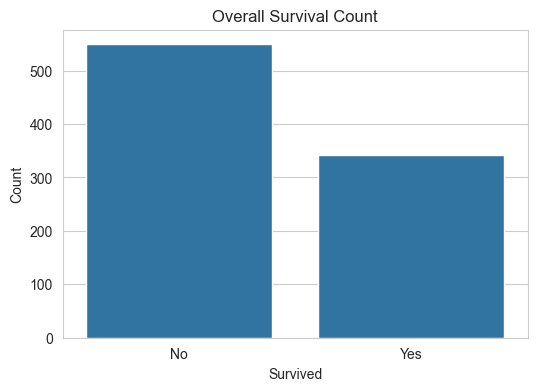

In [8]:
# Cell 6 - Survival count
plt.figure(figsize=(6,4))
sns.countplot(x='survived_label', data=df)
plt.title('Overall Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.savefig('images/survival_count.png', bbox_inches='tight')
plt.show()


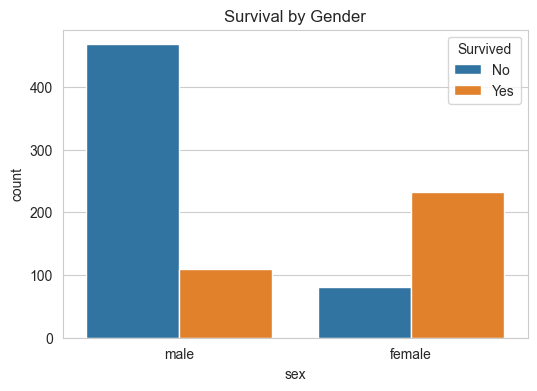

In [9]:
# Cell 7 - Survival by gender (counts)
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='survived_label', data=df)
plt.title('Survival by Gender')
plt.legend(title='Survived')
plt.savefig('images/survival_by_gender.png', bbox_inches='tight')
plt.show()


C:\Users\junai\AppData\Local\Temp\ipykernel_9728\3387063838.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_rate = df.groupby('class')['survived'].mean().reset_index()


,class,survived_pct
0,First,62.962963
1,Second,47.282609
2,Third,24.236253


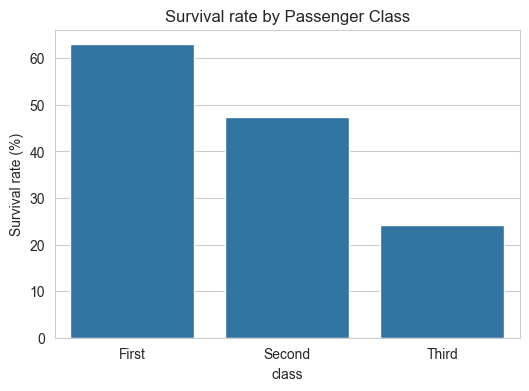

In [10]:
# Cell 8 - Survival rate by class (percentage)
class_rate = df.groupby('class')['survived'].mean().reset_index()
class_rate['survived_pct'] = class_rate['survived'] * 100
display(class_rate[['class','survived_pct']])

plt.figure(figsize=(6,4))
sns.barplot(x='class', y='survived_pct', data=class_rate, order=sorted(class_rate['class'].unique()))
plt.ylabel('Survival rate (%)')
plt.title('Survival rate by Passenger Class')
plt.savefig('images/survival_rate_by_class.png', bbox_inches='tight')
plt.show()


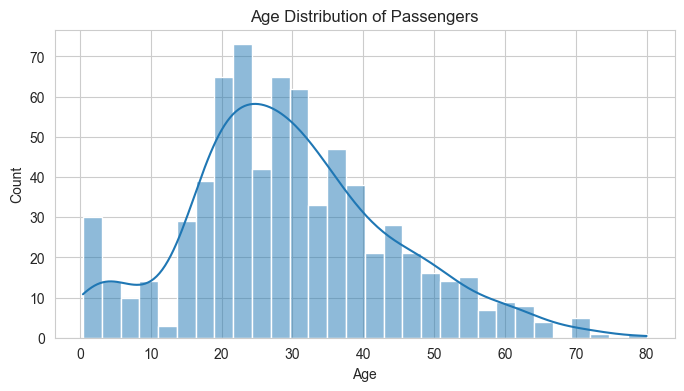

In [11]:
# Cell 9 - Age distribution
plt.figure(figsize=(8,4))
sns.histplot(df['age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.savefig('images/age_distribution.png', bbox_inches='tight')
plt.show()


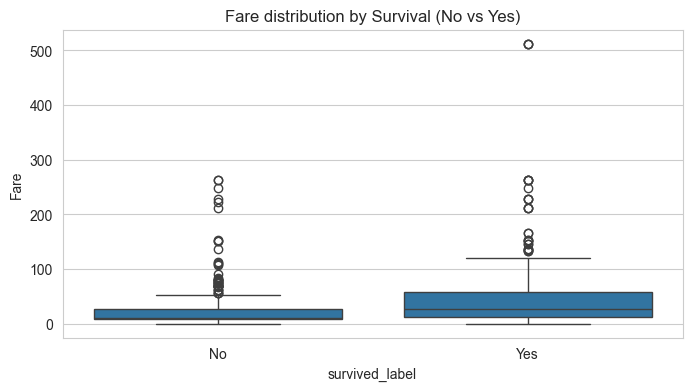

In [12]:
# Cell 10 - Fare distribution by survival
plt.figure(figsize=(8,4))
sns.boxplot(x='survived_label', y='fare', data=df)
plt.title('Fare distribution by Survival (No vs Yes)')
plt.ylabel('Fare')
plt.savefig('images/fare_by_survival.png', bbox_inches='tight')
plt.show()


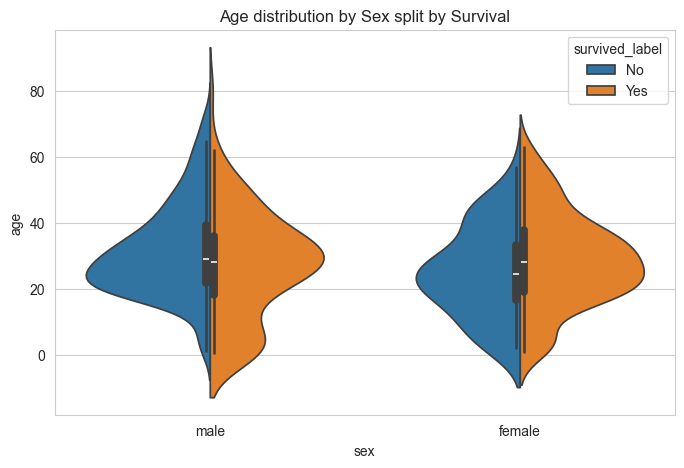

In [13]:
# Cell 11 - Violin: age by sex, split by survival
plt.figure(figsize=(8,5))
# ensure hue has only two levels (Yes/No)
sns.violinplot(x='sex', y='age', hue='survived_label', data=df, split=True)
plt.title('Age distribution by Sex split by Survival')
plt.savefig('images/age_sex_survival_violin.png', bbox_inches='tight')
plt.show()


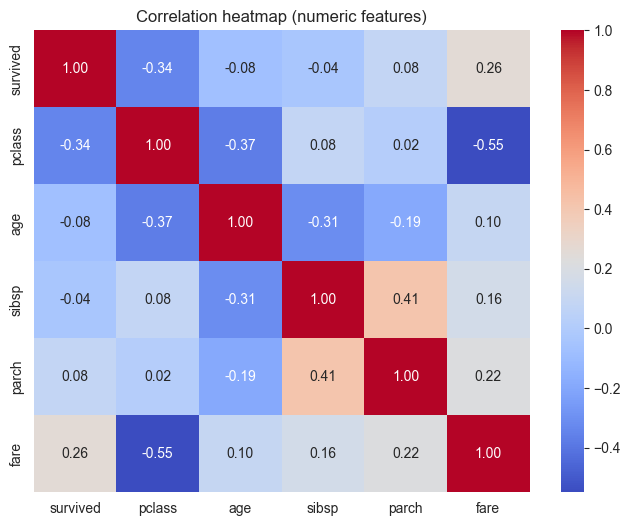

In [14]:
# Cell 12 - Correlation heatmap (numeric features)
num_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8,6))
sns.heatmap(num_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation heatmap (numeric features)')
plt.savefig('images/corr_heatmap.png', bbox_inches='tight')
plt.show()


C:\Users\junai\AppData\Local\Temp\ipykernel_9728\4094753495.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='class', columns='sex', values='survived', aggfunc='mean') * 100


sex,female,male
class,,
First,96.8,36.9
Second,92.1,15.7
Third,50.0,13.5


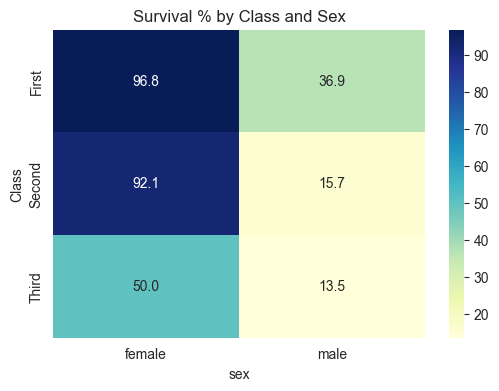

In [15]:
# Cell 13 - Pivot: survival % by class and sex
pivot = df.pivot_table(index='class', columns='sex', values='survived', aggfunc='mean') * 100
display(pivot.round(1))

plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Survival % by Class and Sex')
plt.ylabel('Class')
plt.savefig('images/survival_pct_class_sex.png', bbox_inches='tight')
plt.show()


C:\Users\junai\AppData\Local\Temp\ipykernel_9728\3639440049.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_rate = df.groupby('age_bin')['survived'].mean().reset_index()


,age_bin,survived,survived_pct
0,Child,0.579710,57.971014
1,Teen,0.428571,42.857143
2,Young Adult,0.382682,38.268156
3,Adult,0.400000,40.000000
4,Senior,0.227273,22.727273


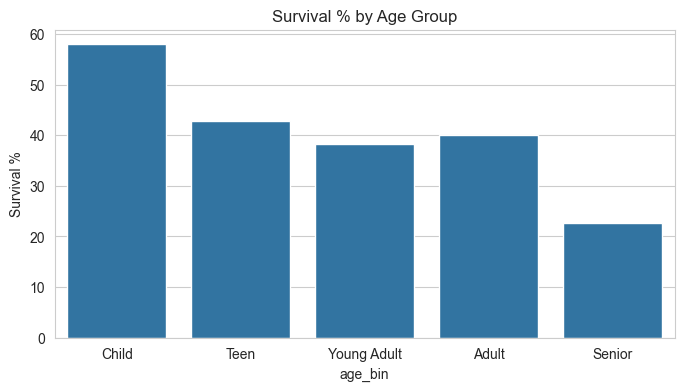

In [16]:
# Cell 14 - Add family_size, is_alone, age_bin
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['is_alone'] = (df['family_size'] == 1).astype(int)
df['age_bin'] = pd.cut(df['age'], bins=[0,12,18,35,60,120],
                       labels=['Child','Teen','Young Adult','Adult','Senior'])

# survival % by age_bin
age_rate = df.groupby('age_bin')['survived'].mean().reset_index()
age_rate['survived_pct'] = age_rate['survived'] * 100
display(age_rate)

plt.figure(figsize=(8,4))
sns.barplot(x='age_bin', y='survived_pct', data=age_rate, order=['Child','Teen','Young Adult','Adult','Senior'])
plt.ylabel('Survival %')
plt.title('Survival % by Age Group')
plt.savefig('images/survival_by_agegroup.png', bbox_inches='tight')
plt.show()


,family_size,survived,survived_pct
0,1,0.303538,30.353818
1,2,0.552795,55.279503
2,3,0.578431,57.843137
3,4,0.724138,72.413793
4,5,0.200000,20.000000
5,6,0.136364,13.636364
6,7,0.333333,33.333333
7,8,0.000000,0.000000
8,11,0.000000,0.000000


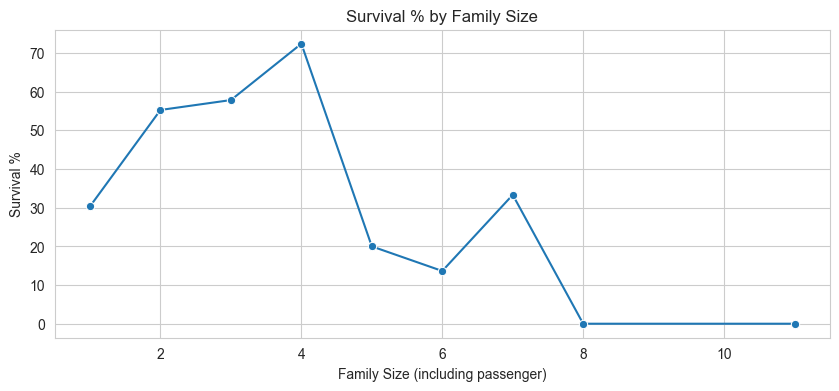

In [17]:
# Cell 15 - Survival % by family size
family_rate = df.groupby('family_size')['survived'].mean().reset_index()
family_rate['survived_pct'] = family_rate['survived']*100
display(family_rate.head(10))

plt.figure(figsize=(10,4))
sns.lineplot(x='family_size', y='survived_pct', data=family_rate, marker='o')
plt.title('Survival % by Family Size')
plt.ylabel('Survival %')
plt.xlabel('Family Size (including passenger)')
plt.savefig('images/survival_by_family_size.png', bbox_inches='tight')
plt.show()


## Key Visual Insights (Summary)

- **Gender:** Women have a noticeably higher survival rate than men.
- **Class:** Passengers in higher classes (1st) show much higher survival percentages than 2nd/3rd.
- **Age:** Children and younger passengers tend to survive at higher rates.
- **Wealth (Fare):** Higher fare values correlate with higher survival probability (wealthier passengers).
- **Family Size:** Very large families tend to have lower survival rate; small families or single passengers vary.

Next steps:
- Try a simple prediction model (Logistic Regression) using selected features.
- Build an interactive dashboard (Streamlit) to present these visuals.


In [18]:
# Cell 17 - Confirm saved images
print("Saved images in ./images:")
for f in os.listdir("images"):
    print("-", f)


Saved images in ./images:
- age_distribution.png
- age_sex_survival_violin.png
- corr_heatmap.png
- fare_by_survival.png
- survival_by_agegroup.png
- survival_by_family_size.png
- survival_by_gender.png
- survival_count.png
- survival_pct_class_sex.png
- survival_rate_by_class.png
